In [1]:
from preparator import DatasetDirectoryController, LABELS
from filter import DatasetFilter, PATH_TO_DATASET, MPDatasetFilter
%matplotlib inline

TkAgg


In [3]:
! rm -r /home/odyssey/mmk_smoke_detection/dataset_preparator/expanded_val/
! cp -r /home/odyssey/mmk_smoke_detection/validation/expanded_val/   /home/odyssey/mmk_smoke_detection/dataset_preparator/expanded_val/

In [2]:
# PATH_TO_FILTERED_DATSET = "/home/odyssey/mmk_smoke_detection/dataset_preparator/expanded_val"
PATH_TO_FILTERED_DATSET = "/home/odyssey/mmk_smoke_detection/dataset_preparator/filtered_dataset"

In [30]:
import os 


dir_controller = DatasetDirectoryController(
    dataset_main_dir=PATH_TO_FILTERED_DATSET
)

dir_controller.prepare_directories()
data_filter = MPDatasetFilter(
    dir_controller=dir_controller,
    path_to_dataset=PATH_TO_FILTERED_DATSET,
    glob_rule=os.path.join(PATH_TO_FILTERED_DATSET, "emission", "*.jpg"),
    label_idx=1
)

Already handled 10720
Images to handle: 16187


Label was correct
Already handled of all 10812/26907
Already handled class count 1000


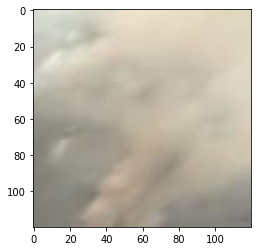

Process FilterTaskHandler-14:
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/odyssey/mmk_smoke_detection/dataset_preparator/filter.py", line 268, in run
    self.handle_from_q()


KeyboardInterrupt: Interrupted by user

  File "/home/odyssey/mmk_smoke_detection/dataset_preparator/filter.py", line 253, in handle_from_q
    action, dst_dir, img_path = self._q.get()
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 97, in get
    res = self._recv_bytes()
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


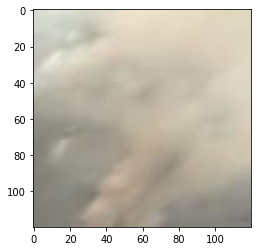

In [31]:
data_filter.handle_images()

# XS# ! ls filtered_dataset_copy/background | grep '172.30.71.105_frame_08-24-2021_05:19:35_198affce-b355-4cb8-8dbd-4f15052acedf.jpg'

In [32]:
!nvidia-smi

Tue Nov  9 19:31:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   49C    P8    14W /  N/A |   3019MiB /  7973MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
from filter import extract_with_already_handled, extract_without_already_handled
import shutil

EMISSION_DATASET_PATH = "filtered_dataset"
BACKGROUND_DATASET_PATH = "filtered_dataset_copy"
RESULT_DATASET_PATH = "merged_ready_dataset_2"

if os.path.exists(RESULT_DATASET_PATH):
    shutil.rmtree(RESULT_DATASET_PATH)

dir_controller = DatasetDirectoryController(
    dataset_main_dir=RESULT_DATASET_PATH
)

dir_controller.prepare_directories()


background_size = extract_with_already_handled(
    dircon=dir_controller,
    label_idx=0,
    path_to_dataset=BACKGROUND_DATASET_PATH,
)
emission_size = extract_with_already_handled(
    dircon=dir_controller,
    label_idx=1,
    path_to_dataset=EMISSION_DATASET_PATH,
)


extract_without_already_handled(
    dircon=dir_controller,
    label_idx=2,
    path_to_dataset=BACKGROUND_DATASET_PATH,
    dataset_size=15000
)
extract_without_already_handled(
    dircon=dir_controller,
    label_idx=3,
    path_to_dataset=BACKGROUND_DATASET_PATH,
    dataset_size=background_size//3
)

    

LEN background: 4700


100%|██████████| 4700/4700 [00:00<00:00, 19753.31it/s]


LEN emission: 5509


100%|██████████| 5509/5509 [00:00<00:00, 20225.22it/s]


LEN fire: 15000


100%|██████████| 15000/15000 [00:02<00:00, 5757.32it/s]


LEN machine: 1566


100%|██████████| 1566/1566 [00:00<00:00, 5822.61it/s]
